### Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import roc_curve

### Data Prepare

**dataset 1 (lipinsky)**

In [2]:
df_PDL1 = pd.read_csv('/content/label2class_PD-L1.csv')
df_PDL1

,molecule_chembl_id,class,canonical_smiles,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL4089730,inactive,COc1nc(OCc2cccc(-c3ccccc3)c2C)ccc1CNCCNC(C)=O,419.525,3.87032,2,5,7.017729
1,CHEMBL4516321,active,CC(=O)NCCNCc1cc(C)c(OCc2cccc(-c3ccccc3)c2C)cc1...,534.660,5.62082,2,6,8.602060
2,CHEMBL4436703,active,CCNCc1cc(C)c(OCc2cccc(-c3ccccc3)c2C)cc1OCc1cnc...,477.608,6.50462,1,5,8.657577
3,CHEMBL4575618,active,CC(=O)NCCNCc1cc(C)c(OCc2cccc(-c3cccc(COc4cc(OC...,915.108,7.88804,4,12,8.522879
4,CHEMBL4528795,active,CCNCc1cc(C)c(OCc2cccc(-c3cccc(COc4cc(OCc5cncc(...,801.004,9.65564,2,10,8.420216
...,...,...,...,...,...,...,...,...
1015,CHEMBL4776700,active,Cn1cnc(S(=O)(=O)N2CCCC3=C[C@H]4C[C@H](CN5CCCC[...,376.526,2.00380,0,5,9.000000
1016,CHEMBL5171101,active,CCCC[C@H]1C(=O)N(C)[C@@H](CCCC)C(=O)N[C@@H](C)...,1866.139,-3.56110,19,23,8.987163
1017,CHEMBL5411746,inactive,CC(C)OC(=O)[C@@H](Cn1ccnc1)NC(=O)C1CCCN(C(=O)c...,488.588,3.53890,1,6,7.200659
1018,CHEMBL5398154,active,Cc1c(COc2cc(OCc3cncc(C#N)c3)c(CN3CCCC[C@H]3C(=...,753.340,7.71322,2,9,9.318759


**Melakukan transformasi class menjadi numeric ordinal**

In [3]:
# Mapping kelas kategori (class) ke nilai numerik (0,1)
mapping = {'active': 0, 'inactive': 1}
df_PDL1['class_numeric'] = df_PDL1['class'].map(mapping)

df_PDL1

,molecule_chembl_id,class,canonical_smiles,MW,LogP,NumHDonors,NumHAcceptors,pIC50,class_numeric
0,CHEMBL4089730,inactive,COc1nc(OCc2cccc(-c3ccccc3)c2C)ccc1CNCCNC(C)=O,419.525,3.87032,2,5,7.017729,1
1,CHEMBL4516321,active,CC(=O)NCCNCc1cc(C)c(OCc2cccc(-c3ccccc3)c2C)cc1...,534.660,5.62082,2,6,8.602060,0
2,CHEMBL4436703,active,CCNCc1cc(C)c(OCc2cccc(-c3ccccc3)c2C)cc1OCc1cnc...,477.608,6.50462,1,5,8.657577,0
3,CHEMBL4575618,active,CC(=O)NCCNCc1cc(C)c(OCc2cccc(-c3cccc(COc4cc(OC...,915.108,7.88804,4,12,8.522879,0
4,CHEMBL4528795,active,CCNCc1cc(C)c(OCc2cccc(-c3cccc(COc4cc(OCc5cncc(...,801.004,9.65564,2,10,8.420216,0
...,...,...,...,...,...,...,...,...,...
1015,CHEMBL4776700,active,Cn1cnc(S(=O)(=O)N2CCCC3=C[C@H]4C[C@H](CN5CCCC[...,376.526,2.00380,0,5,9.000000,0
1016,CHEMBL5171101,active,CCCC[C@H]1C(=O)N(C)[C@@H](CCCC)C(=O)N[C@@H](C)...,1866.139,-3.56110,19,23,8.987163,0
1017,CHEMBL5411746,inactive,CC(C)OC(=O)[C@@H](Cn1ccnc1)NC(=O)C1CCCN(C(=O)c...,488.588,3.53890,1,6,7.200659,1
1018,CHEMBL5398154,active,Cc1c(COc2cc(OCc3cncc(C#N)c3)c(CN3CCCC[C@H]3C(=...,753.340,7.71322,2,9,9.318759,0


**dataset 2 (finger print)**

In [4]:
df_fp = pd.read_csv('/content/dataset_modelvariance_PD-L1.csv')
df_fp = df_fp.drop(columns='pIC50')
df_fp

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880,MW,LogP,NumHDonors,NumHAcceptors
0,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,419.525,3.87032,2,5
1,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,534.660,5.62082,2,6
2,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,477.608,6.50462,1,5
3,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,915.108,7.88804,4,12
4,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,801.004,9.65564,2,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1015,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,376.526,2.00380,0,5
1016,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,1866.139,-3.56110,19,23
1017,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,488.588,3.53890,1,6
1018,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,753.340,7.71322,2,9


**dataset 3 (combined)**

In [5]:
df_combined = pd.concat([df_PDL1,df_fp], axis=1)
df_combined.head()

,molecule_chembl_id,class,canonical_smiles,MW,LogP,NumHDonors,NumHAcceptors,pIC50,class_numeric,PubchemFP0,...,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880,MW,LogP,NumHDonors,NumHAcceptors
0,CHEMBL4089730,inactive,COc1nc(OCc2cccc(-c3ccccc3)c2C)ccc1CNCCNC(C)=O,419.525,3.87032,2,5,7.017729,1,1,...,0,0,0,0,0,0,419.525,3.87032,2,5
1,CHEMBL4516321,active,CC(=O)NCCNCc1cc(C)c(OCc2cccc(-c3ccccc3)c2C)cc1...,534.660,5.62082,2,6,8.602060,0,1,...,0,0,0,0,0,0,534.660,5.62082,2,6
2,CHEMBL4436703,active,CCNCc1cc(C)c(OCc2cccc(-c3ccccc3)c2C)cc1OCc1cnc...,477.608,6.50462,1,5,8.657577,0,1,...,0,0,0,0,0,0,477.608,6.50462,1,5
3,CHEMBL4575618,active,CC(=O)NCCNCc1cc(C)c(OCc2cccc(-c3cccc(COc4cc(OC...,915.108,7.88804,4,12,8.522879,0,1,...,0,0,0,0,0,0,915.108,7.88804,4,12
4,CHEMBL4528795,active,CCNCc1cc(C)c(OCc2cccc(-c3cccc(COc4cc(OCc5cncc(...,801.004,9.65564,2,10,8.420216,0,1,...,0,0,0,0,0,0,801.004,9.65564,2,10


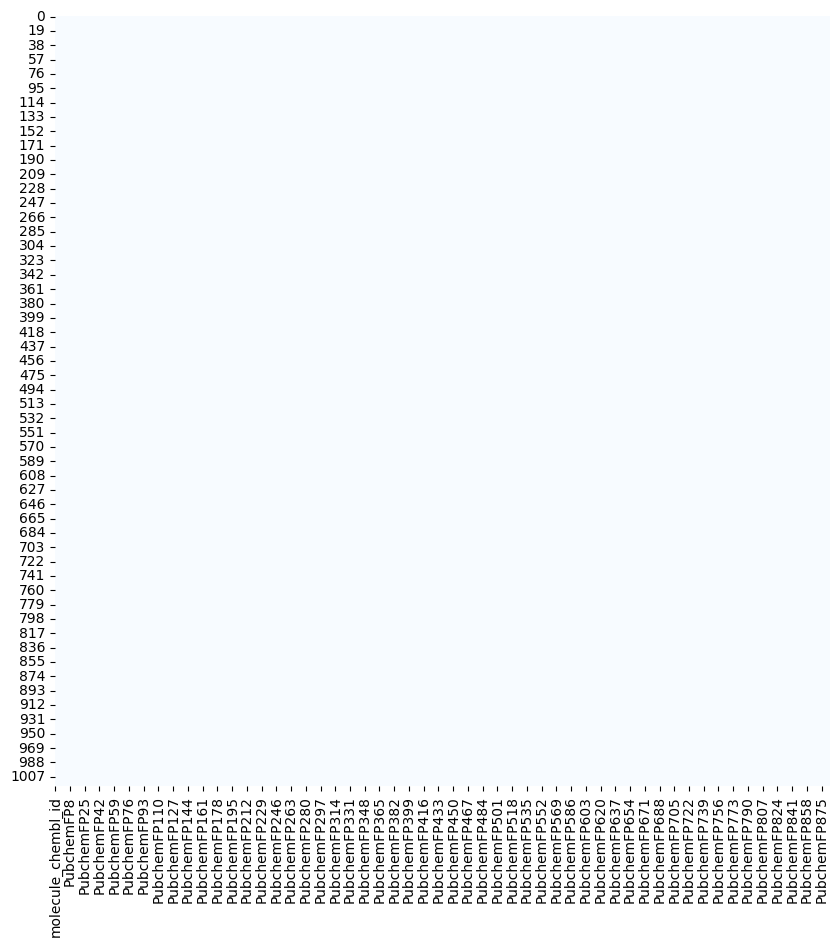

In [6]:
plt.figure(figsize=(10,10))
sns.heatmap(df_combined.isna(), cmap="Blues", cbar=False);

### Exploration Data Analyst

**Plot frekuensi dari dua kelas bioaktifitas**

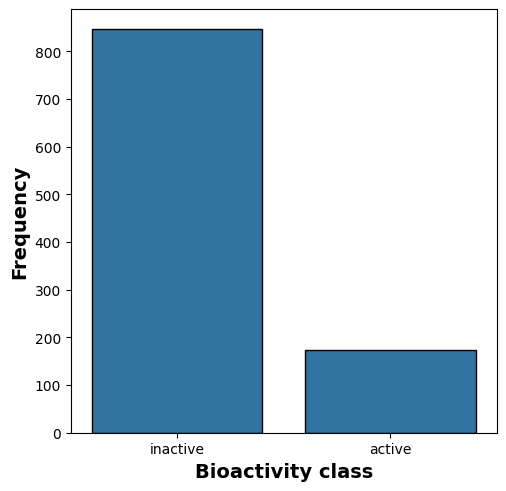

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

plt.figure(figsize=(5.5, 5.5))

sns.countplot(x='class', data=df_PDL1, edgecolor='black')

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('Frequency', fontsize=14, fontweight='bold')

plt.savefig('plot_bioactivity_class.pdf')

**Scatter plot MW vs LogP**

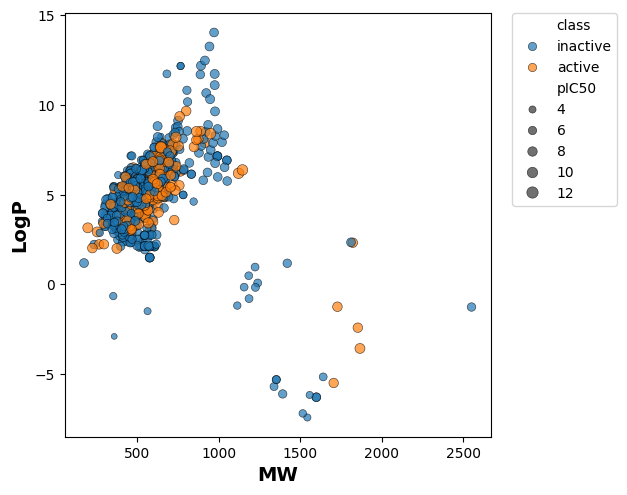

In [8]:
plt.figure(figsize=(5.5, 5.5))

sns.scatterplot(x='MW', y='LogP', data=df_PDL1, hue='class', size='pIC50', edgecolor='black', alpha=0.7)

plt.xlabel('MW', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)
plt.savefig('plot_MW_vs_LogP.pdf')

**pIC50 Value Boxplots**

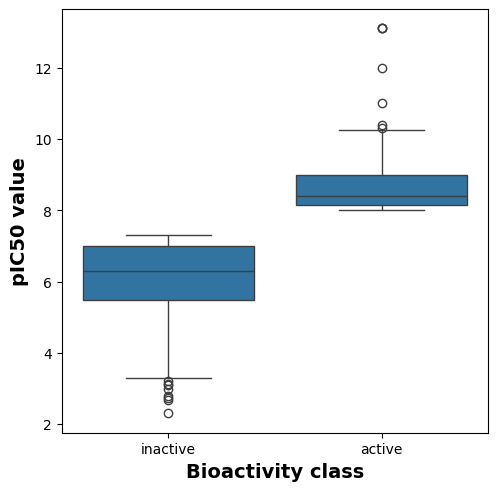

In [9]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'pIC50', data = df_PDL1)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('pIC50 value', fontsize=14, fontweight='bold')

plt.savefig('plot_ic50.pdf')

In [10]:
df_combined['class'].value_counts()

,count
class,
inactive,846
active,174


### X (fitur) dan y (target)

In [11]:
columns_to_drop = [col for col in ['molecule_chembl_id', 'canonical_smiles', 'standard_value', 'class', 'MW', 'LogP', 'NumHDonors', 'NumHAcceptors', 'pIC50'] if col in df_combined.columns]
df = df_combined.drop(columns=columns_to_drop)
df

,class_numeric,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,1,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1015,0,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1016,0,1,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1017,1,1,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1018,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
X = df.drop(columns=['class_numeric'])
X = X.astype(float)
X

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1015,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1016,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1017,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1018,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [13]:
y = df.class_numeric
y

,class_numeric
0,1
1,0
2,0
3,0
4,0
...,...
1015,0
1016,0
1017,1
1018,0


In [14]:
y.value_counts()

,count
class_numeric,
1,846
0,174


In [15]:
X.shape, y.shape

((1020, 881), (1020,))

### Split data

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
print("Shape X_train:", X_train.shape)
print("Shape X_test:", X_test.shape)

Shape X_train: (816, 881)
Shape X_test: (204, 881)


## Tanpa Pipeline

### Random Forest

In [18]:
# Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=20, random_state=42, class_weight='balanced') # Changed variable name to rf_model
rf_model.fit(X_train, y_train)

# Prediksi
y_pred = rf_model.predict(X_test)
y_pred_proba = rf_model.predict_proba(X_test)[:, 1]


### Evaluasi model

Classification Report:
              precision    recall  f1-score   support

           0       0.43      0.39      0.41        23
           1       0.92      0.93      0.93       181

    accuracy                           0.87       204
   macro avg       0.68      0.66      0.67       204
weighted avg       0.87      0.87      0.87       204



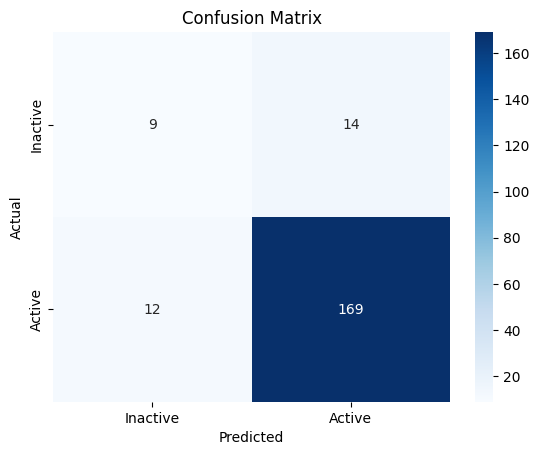

In [20]:
# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Inactive', 'Active'], yticklabels=['Inactive', 'Active'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [21]:
# ROC-AUC Score
roc_auc = roc_auc_score(y_test, y_pred_proba)
print("ROC-AUC Score:", roc_auc)

ROC-AUC Score: 0.8066298342541437


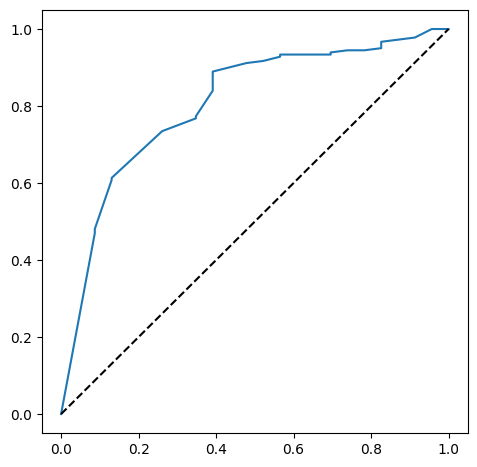

In [22]:
# Plot ROC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(5.5, 5.5))
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.show() # Explicitly call plt.show() to display the plot

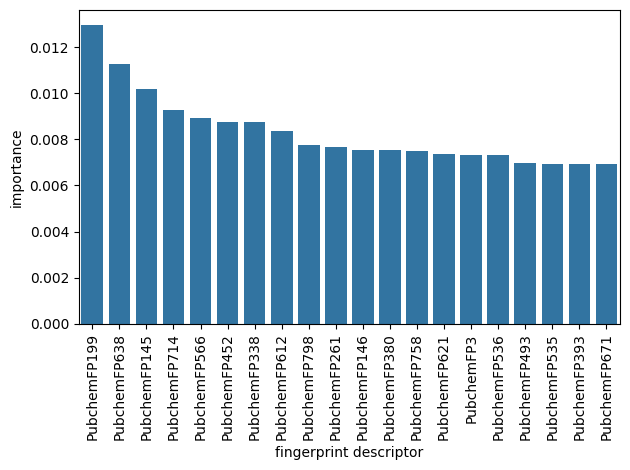

In [25]:
# get importance with Random Forest
importance = rf_model.feature_importances_
fp = sorted(range(len(importance)), key=lambda i: importance[i], reverse=True)[:20]
imp_values = sorted(importance, reverse=True)[:20]
fp = ['PubchemFP'+str(i) for i in fp]
imp_values
fake = pd.DataFrame({'ind': fp, 'importance__': imp_values})
sns.set_color_codes("pastel")
ax = sns.barplot(x = 'ind', y = 'importance__', data = fake)
ax.set(xlabel='fingerprint descriptor', ylabel='importance')
plt.xticks(rotation=90)
plt.tight_layout()
#plt.show()

## Menggunakan Pipeline

### preprocessor

In [26]:
numerical_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy='mean')),
    ("scaler", MinMaxScaler())
])
categorical_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy='most_frequent')),
    ("ordinal_encoder", OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1))
])

numeric = []
categoric = [col for col in X_train.columns if col not in numeric]

preprocessor = ColumnTransformer([
    ("numeric", numerical_pipeline, numeric),
    ("categoric", categorical_pipeline,categoric)
])


### Random Forest

In [27]:
pipeline = Pipeline([
    ("prep", preprocessor),
    ("classifier", RandomForestClassifier())
])

### Train Model

In [28]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   MinMaxScaler())]),
                                                  []),
                                                 ('categoric',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ordinal_encoder',
                                                                   OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                  unknown_value=-1))]),
                                                  ['PubchemFP0', 'PubchemFP1',
                                                   'PubchemF...
                                                   'PubchemFP8', 'PubchemFP9',
                                                   'PubchemFP10', 'PubchemFP11',
                                                   'PubchemFP12', 'PubchemFP13',
                                                   'PubchemFP14', 'PubchemFP15',
                                                   'PubchemFP16', 'PubchemFP17',
                                                   'PubchemFP18', 'PubchemFP19',
                                                   'PubchemFP20', 'PubchemFP21',
                                                   'PubchemFP22', 'PubchemFP23',
                                                   'PubchemFP24', 'PubchemFP25',
                                                   'PubchemFP26', 'PubchemFP27',
                                                   'PubchemFP28', 'PubchemFP29', ...])])),
                ('classifier', RandomForestClassifier())])

### Data predict

In [29]:
y_pred = pipeline.predict(X_test)
y_pred_proba = pipeline.predict_proba(X_test)[:, 1]

### Hyperparameter Tuning

In [30]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'classifier__n_estimators': [5, 10, 15, 20, 50, 100],
    'classifier__max_depth': [10, 20, None],
    'classifier__min_samples_split': [2, 5, 10],
}

model = GridSearchCV(pipeline, param_grid, cv=5, n_jobs=-1, verbose=1)
model.fit(X_train, y_train)

Fitting 5 folds for each of 54 candidates, totalling 270 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('prep',
                                        ColumnTransformer(transformers=[('numeric',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer()),
                                                                                         ('scaler',
                                                                                          MinMaxScaler())]),
                                                                         []),
                                                                        ('categoric',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('ordinal_encoder',
                                                                                          OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                                         unknown_value=-1))]),
                                                                         ['Pubche...
                                                                          'PubchemFP19',
                                                                          'PubchemFP20',
                                                                          'PubchemFP21',
                                                                          'PubchemFP22',
                                                                          'PubchemFP23',
                                                                          'PubchemFP24',
                                                                          'PubchemFP25',
                                                                          'PubchemFP26',
                                                                          'PubchemFP27',
                                                                          'PubchemFP28',
                                                                          'PubchemFP29', ...])])),
                                       ('classifier',
                                        RandomForestClassifier())]),
             n_jobs=-1,
             param_grid={'classifier__max_depth': [10, 20, None],
                         'classifier__min_samples_split': [2, 5, 10],
                         'classifier__n_estimators': [5, 10, 15, 20, 50, 100]},
             verbose=1)

In [31]:
# evaluation
print(model.best_params_)
print(model.score(X_train, y_train), model.best_score_, model.score(X_test, y_test))

{'classifier__max_depth': 20, 'classifier__min_samples_split': 5, 'classifier__n_estimators': 10}
0.9485294117647058 0.8725123447553493 0.8921568627450981


In [32]:
y_pred_best = model.predict(X_test) # Predict using the best model
y_pred_best_proba = model.predict_proba(X_test)[:, 1] # Predict probabilities using the best model

In [33]:
print("\nClassification Report (Best Model):")
print(classification_report(y_test, y_pred_best))


Classification Report (Best Model):
              precision    recall  f1-score   support

           0       0.53      0.43      0.48        23
           1       0.93      0.95      0.94       181

    accuracy                           0.89       204
   macro avg       0.73      0.69      0.71       204
weighted avg       0.88      0.89      0.89       204



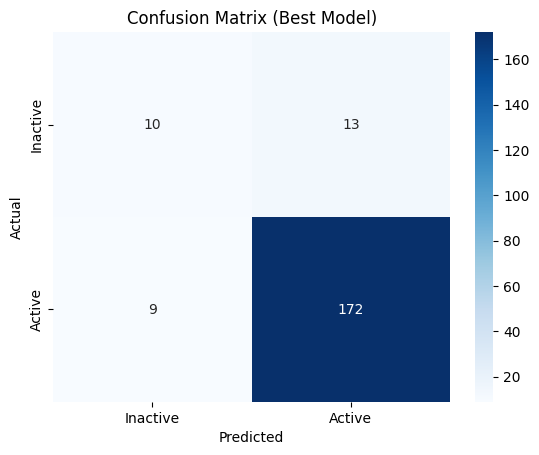

In [34]:
# Confusion Matrix untuk model terbaik
conf_matrix_best = confusion_matrix(y_test, y_pred_best)
sns.heatmap(conf_matrix_best, annot=True, fmt='d', cmap='Blues', xticklabels=['Inactive', 'Active'], yticklabels=['Inactive', 'Active'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Best Model)')
plt.show()

In [35]:
# ROC-AUC untuk model terbaik
roc_auc_best = roc_auc_score(y_test, y_pred_best_proba)
print("\nROC-AUC Score (Best Model):", roc_auc_best)


ROC-AUC Score (Best Model): 0.8839779005524863


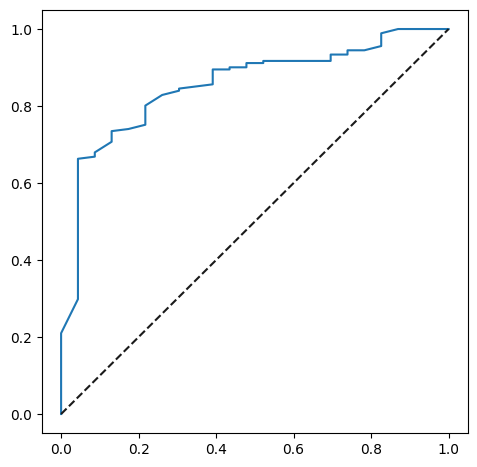

In [37]:
# Plot ROC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(5.5, 5.5))
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.show() # Explicitly call plt.show() to display the plot

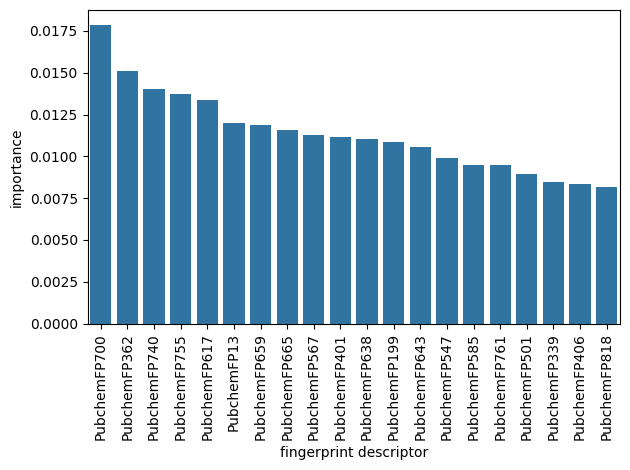

In [39]:
# get importance with Random Forest
importance = model.best_estimator_.named_steps['classifier'].feature_importances_
fp = sorted(range(len(importance)), key=lambda i: importance[i], reverse=True)[:20]
imp_values = sorted(importance, reverse=True)[:20]
fp = ['PubchemFP'+str(i) for i in fp]
imp_values
fake = pd.DataFrame({'ind': fp, 'importance__': imp_values})
ax = sns.barplot(x = 'ind', y = 'importance__', data = fake)
ax.set(xlabel='fingerprint descriptor', ylabel='importance')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()